DBSCAN implementation

In [35]:
import numpy as np
import matplotlib.pyplot as plt

class Point:
    def __init__(self, p: list, i: int):
        self.point = p
        self.neighbors = []
        self.index = i
        self.classification = 0
        self.cluster = 0
    def toString(self) :
        name = '' + str(self.point)
        return name
    def getX(self):
        return self.point[0]
    def getY(self):
        return self.point[1]
    def classify(self):
        if self.classification == 1:
            return "Core Point"
        elif self.classification == 2:
            return "Border Point"
        else:
            return "Outlier"
    def setClassify(self, c: int):
        self.classification = c
    def setCluster(self, c: int):
        self.cluster = c


def recursiveCluster(p: Point, minPts: int, clusterNumber: int, marked: list):
    #print("inside recursive call")
    # 0 - outlier, 1 - core point, 2 - border point
    # Sets each neighbor and point as part of a cluster if it has > minPts neighbors
    #print("Marked index: ", marked[p.index])
    if marked[p.index] == 1:
        #print("already indexed")
        return
    #print("Len p neighbors: ", len(p.neighbors))
    if len(p.neighbors) >= minPts:
        #print("Core point")
        p.setClassify(1)
        p.setCluster(clusterNumber)
        marked[p.index] = 1
        for n in p.neighbors:
            n.setCluster(clusterNumber)
            recursiveCluster(n, minPts, clusterNumber, marked)

    # If it is not a core point, check if it is a border point.
    elif len(p.neighbors) > 0:
        #print("Border Point")
        p.setCluster(clusterNumber)
        p.setClassify(2)
        marked[p.index] = 1


    else:
        marked[p.index]


def dbscan(matrix: list, minPoints: int, epsilon: float):
    clusteredPoints = []
    points = []
    count = 0

    # puts data into points class
    for x in matrix:
        points.append(Point(x, count))
        count += 1

    # Now add each points neighbors
    for x in points:
        for y in points:
            if x.toString() == y.toString():
                continue
            else:
                distance = np.sqrt(np.square(y.getX() - x.getX()) + np.square(y.getY() - x.getY()))
                #print("Distance: ", distance)
                if distance <= epsilon:
                    x.neighbors.append(y)

    # Now we recursively call a method to add them to clusters
    marked = np.zeros((100, 1))
    cluster = 1
    count = 0
    while sum(marked) < 99 and count < 99:
        #print(count)
        recursiveCluster(points[count], minPoints, cluster, marked)
        count += 1
        cluster += 1

    print("Clusters : ", cluster)
    print("Marked sum: ", sum(marked))

    for x in points:
        loc = str(x.getX()) + ", " + str(x.getY())
        c = x.cluster
        cl = x.classify()
        print(loc, " ", c, " ", cl)
    print("Total points: ", len(points))

    return points;

m = np.random.randint(100, size=(100,2))

from sklearn.preprocessing import StandardScaler
import pandas as pd

boston = pd.read_csv('Raisin_Dataset.csv', index_col=0)

scale = StandardScaler()
normal = scale.fit_transform(boston)
pcaB = PCA(n_components=2)
pca_boston = pcaB.fit_transform(normal)



Clusters :  100
Marked sum:  [30.]
71, 90   0   Outlier
49, 29   0   Outlier
3, 74   0   Outlier
84, 65   0   Outlier
20, 80   0   Outlier
42, 28   22   Border Point
26, 87   0   Outlier
52, 48   8   Border Point
66, 9   0   Outlier
2, 89   10   Border Point
90, 68   0   Outlier
10, 12   0   Outlier
97, 37   0   Outlier
39, 32   22   Border Point
33, 26   0   Outlier
99, 89   0   Outlier
50, 88   0   Outlier
82, 20   0   Outlier
94, 28   0   Outlier
72, 18   20   Border Point
25, 24   0   Outlier
39, 28   22   Core Point
24, 18   0   Outlier
67, 44   24   Border Point
83, 45   0   Outlier
54, 0   26   Border Point
10, 67   0   Outlier
6, 91   28   Border Point
99, 57   0   Outlier
70, 19   30   Border Point
34, 50   0   Outlier
20, 43   0   Outlier
0, 66   0   Outlier
97, 12   0   Outlier
15, 33   0   Outlier
23, 12   0   Outlier
5, 38   0   Outlier
1, 10   0   Outlier
6, 6   0   Outlier
38, 75   0   Outlier
85, 50   0   Outlier
51, 2   42   Border Point
76, 29   43   Core Point
9, 72 

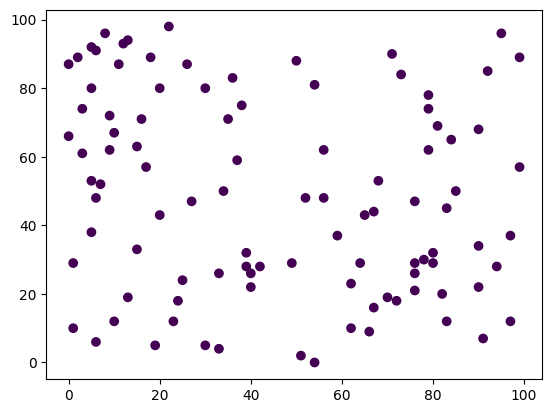

In [36]:
data = dbscan(m, 3, 4)


#DB Cluster mapping from sklearn
#from sklearn.cluster import DBSCAN
#dbs = DBSCAN(eps=0.4, min_samples=5);
#dbs.fit(m);

#plt.scatter(m[:,0],m[:,1], c=dbs.labels_)

dataX = []

dataY = []

dataLabel = []

for i in range(len(data)):
    dataX.append(data[i].getX())
    dataY.append(data[i].getY())
    dataLabel.append(data[i].cluster)

print(dataX)
print(dataY)
print(dataLabel)

scatter = plt.scatter(dataX, dataY, c=dataLabel, cmap='viridis', )

# Add a legend for the colors
plt.legend(*scatter.legend_elements(), title="Labels")

# Add axis labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()